In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sys

In [5]:
def get_val(wsp, x):
    val = 0
    for i, elem in enumerate(wsp):
        val += elem * x ** i
    return val

In [28]:
def apr(X, Y, x, m):
    n = len(X)
    
    # macierz współczynników układu równań
    matrix = np.zeros((m + 1,m + 1))
    
    # macierz wyników układu równań
    wyn = np.zeros(m + 1)
    
    for i in range(m + 1):
        for j in range(m + 1):
            for val in X:
                matrix[i][j] += val ** (i + j)
        for k in range(n):
            wyn[i] += Y[k] * X[k] ** i
        
    # współczynniki wielomianów
    wsp = np.linalg.solve(matrix,wyn)
    
    ys = []
    for i in range(len(x)):
        ys+=[get_val(wsp, x[i])]

    return ys

In [29]:
def cal(a, b, x):
    wyn = a[0]/2
    for j in range(1,len(a)):
        wyn += a[j]*math.cos(j * x) + b[j]*math.sin(j * x)
    return wyn

In [44]:
def aprTryg(X, Y, x, m):
    n = len(X)
    a = np.zeros(m + 1)
    b = np.zeros(m + 1)
    for i in range(m):
        for j in range(n - 1):
            a[i] += Y[j]*math.cos(i * X[j])
        a[i] *= 2/n
        for j in range(n - 1):
            b[i] += Y[j]*math.sin(i * X[j])
        b[i] *= 2/n
    y = []
    for val in x:
        y += [cal(a,b,val)]
    return y

In [31]:
def czeb(k):
    return [(math.cos((2*j -1)/(2*k) * math.pi) + 1)/2 for j in range(1,k+1)]

In [32]:
def reg(k): # k rowno od 0 do 1
    return [x/(k - 1) for x in range(k)]

In [33]:
def scale(x,l,p): # z [o,1] a [l,p]
    return x * (p-l) + l

In [34]:
def f(x):
    k = 1
    m = 1
    return math.sin(m*x)*math.sin(k*x**2/math.pi)

In [35]:
def diff(Y_1,Y_2):
    diff=0
    for i in range(len(Y_2)):
        diff = max(diff,abs(Y_1[i]-Y_2[i]))
    return diff

def error(Y_1,Y_2):
    error = 0
    for i in range(len(Y_2)):
        error += (Y_1[i] - Y_2[i]) ** 2
    return error/len(Y_1)

In [54]:
points = 100
n = 1000
deg = 20

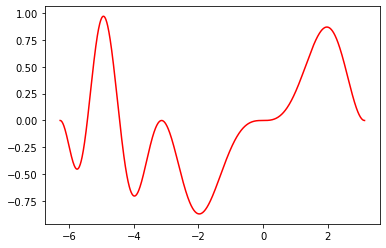

In [55]:
f_X = [scale(x,(-2) * math.pi,math.pi) for x in reg(n)]
f_Y = [f(x) for x in f_X]

plt.plot(f_X,f_Y,'r-')

Max difference: 
0.01893837506420265
standard error: 
0.00014114907215879746


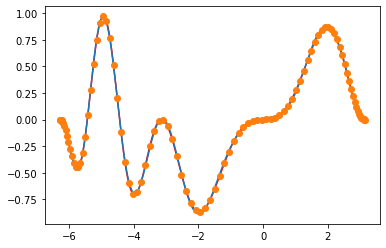

In [56]:
X = [scale(x,(-2) * math.pi,math.pi) for x in czeb(points)]
Y = [f(x) for x in X]
X_A = [scale(x,(-2) * math.pi,math.pi) for x in reg(n)]
Y_A = apr(X,Y,X_A,deg)

print("Max difference: ")
print(diff(f_Y,Y_A))
print("standard error: ")
print(error(f_Y,Y_A))

plt.plot(f_X,f_Y,'r-')
plt.plot(X_A,Y_A)
plt.plot(X,Y,'o')

Max difference: 
0.7633114847557981
standard error: 
0.10206565032725978


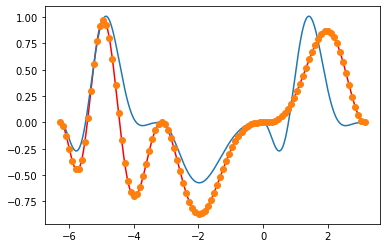

In [60]:
X = [scale(x,(-2) * math.pi,math.pi) for x in reg(points)]
Y = [f(x) for x in X]
X_A = [scale(x,(-2) * math.pi,math.pi) for x in reg(n)]
Y_A = aprTryg(X,Y,X_A,deg)

print("Max difference: ")
print(diff(f_Y,Y_A))
print("standard error: ")
print(error(f_Y,Y_A))

plt.plot(f_X,f_Y,'r-')
plt.plot(X_A,Y_A)
plt.plot(X,Y,'o')